<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Detrending-the-Airpassenger-data" data-toc-modified-id="Detrending-the-Airpassenger-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Detrending the Airpassenger data</a></span></li><li><span><a href="#Create-a-stationarity-check" data-toc-modified-id="Create-a-stationarity-check-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create a stationarity check</a></span></li><li><span><a href="#Perform-a-log()-and-sqrt()-transform" data-toc-modified-id="Perform-a-log()-and-sqrt()-transform-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Perform a log() and sqrt() transform</a></span></li><li><span><a href="#Subtracting-the-rolling-mean" data-toc-modified-id="Subtracting-the-rolling-mean-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Subtracting the rolling mean</a></span><ul class="toc-item"><li><span><a href="#Based-on-the-visuals-and-on-the-Dickey-Fuller-test,-what-do-you-conclude?" data-toc-modified-id="Based-on-the-visuals-and-on-the-Dickey-Fuller-test,-what-do-you-conclude?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Based on the visuals and on the Dickey-Fuller test, what do you conclude?</a></span></li></ul></li><li><span><a href="#Subtracting-the-weighted-rolling-mean" data-toc-modified-id="Subtracting-the-weighted-rolling-mean-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Subtracting the weighted rolling mean</a></span><ul class="toc-item"><li><span><a href="#Based-on-the-visuals-and-on-the-Dickey-Fuller-test,-what-do-you-conclude?" data-toc-modified-id="Based-on-the-visuals-and-on-the-Dickey-Fuller-test,-what-do-you-conclude?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Based on the visuals and on the Dickey-Fuller test, what do you conclude?</a></span></li></ul></li><li><span><a href="#Differencing" data-toc-modified-id="Differencing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Differencing</a></span><ul class="toc-item"><li><span><a href="#Your-conclusion" data-toc-modified-id="Your-conclusion-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Your conclusion</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

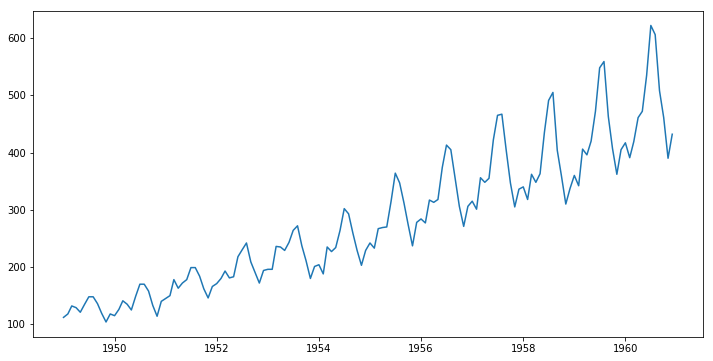

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# Import passengers.csv and set it as a time-series object. Plot the TS
ts = pd.read_csv('passengers.csv')
ts.set_index(pd.to_datetime(ts.Month), inplace=True)
ts = ts['#Passengers']
plt.figure(figsize=(12,6))
plt.plot(ts);


## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [22]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(ts):
    df_output = adfuller(ts)
    roll_object = ts.rolling(8)
    ts_ma = roll_object.mean()
    ts_mstd = roll_object.std()
    fig = plt.figure(figsize=(12,7))
    orig = plt.plot(ts, c='b', label='initial TS')
    ma = plt.plot(ts_ma, c='g', label='moving average')
    mstd = plt.plot(ts_mstd, c='r', label='moving std')
    plt.legend()
    plt.show()
    return df_output



Use your newly created function on the airpassenger data set.

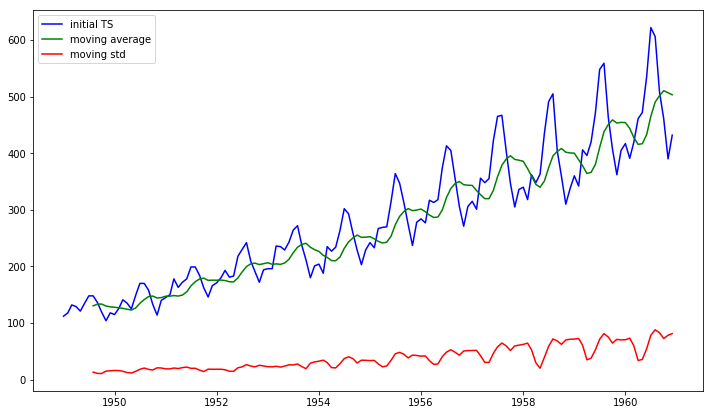

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [23]:
# Code here
stationarity_check(ts)

## Perform a log() and sqrt() transform

In [24]:
# Log transform timeseries and compare with original to check the effect
log_ts = pd.Series(np.log(ts), index=ts.index)
sqrt_ts = pd.Series(np.sqrt(ts), index=ts.index)

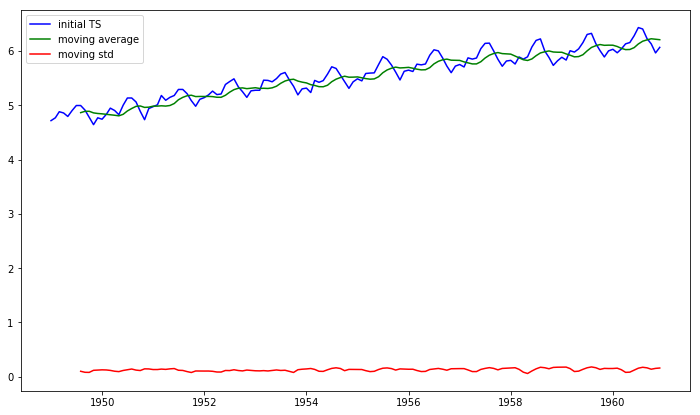

(-1.7170170891069625,
 0.4223667747703904,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [25]:
stationarity_check(log_ts)

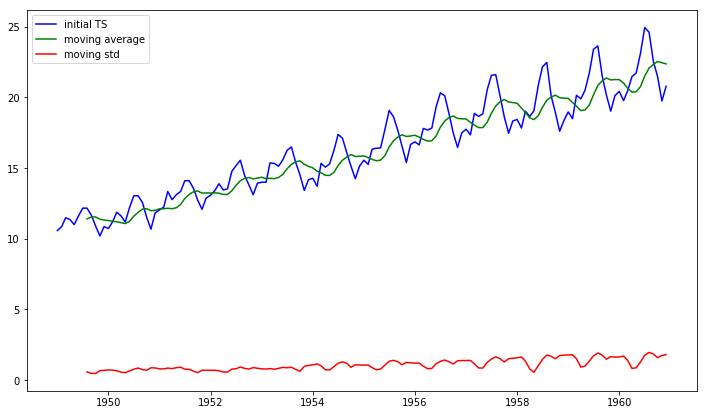

(-0.3458537677156894,
 0.9187543217618347,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 86.2558110746069)

In [26]:
stationarity_check(sqrt_ts)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

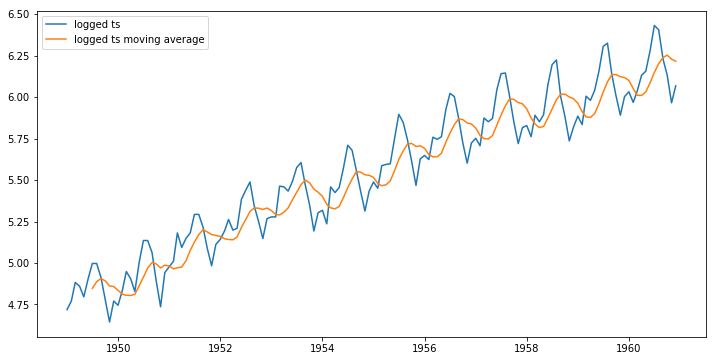

In [30]:
# your code here
rolllogmean = log_ts.rolling(7).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(log_ts, label='logged ts')
plt.plot(rolllogmean, label='logged ts moving average')
plt.legend();

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [31]:
# Subtract the moving average from the original data and check head for Nans
log_ts_minus_ma = log_ts - rolllogmean
display(log_ts_minus_ma.head(10))

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.150059
1949-08-01    0.110242
1949-09-01    0.005404
1949-10-01   -0.113317
Name: #Passengers, dtype: float64

In [32]:
# Drop the NaN values from timeseries calculated above
log_ts_minus_ma.dropna(inplace=True)
display(log_ts_minus_ma.head(10))


Month
1949-07-01    0.150059
1949-08-01    0.110242
1949-09-01    0.005404
1949-10-01   -0.113317
1949-11-01   -0.217275
1949-12-01   -0.087394
1950-01-01   -0.090241
1950-02-01    0.024099
1950-03-01    0.143499
1950-04-01    0.101068
Name: #Passengers, dtype: float64

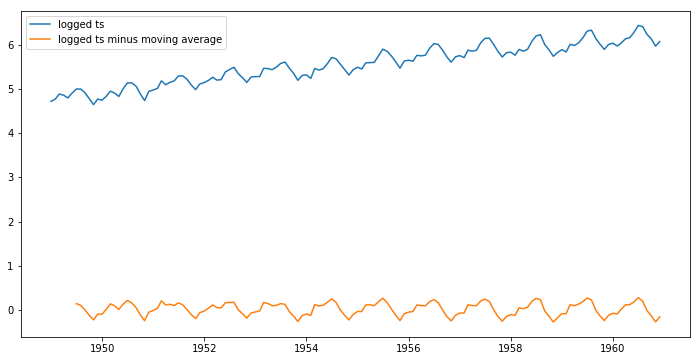

In [34]:
# Plot the result
fig = plt.figure(figsize=(12,6))
plt.plot(log_ts, label='logged ts')
plt.plot(log_ts_minus_ma, label='logged ts minus moving average')
plt.legend();

Finally, use your function `check_stationarity` to see if this series is considered stationary!

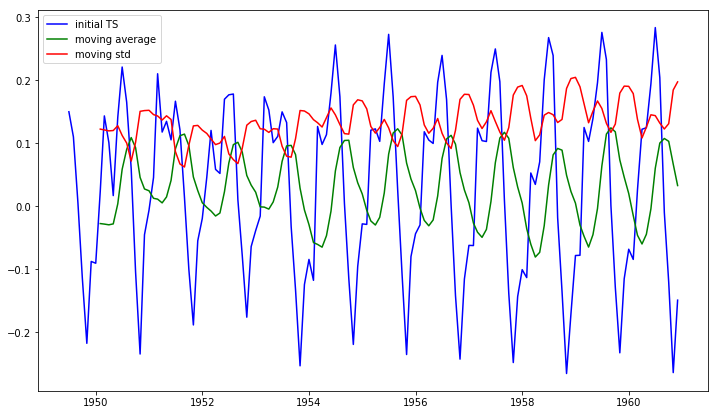

(-2.3480270028588084,
 0.15694559814096715,
 14,
 123,
 {'1%': -3.4846672514209773,
  '5%': -2.8853397507076006,
  '10%': -2.5794629869786503},
 -461.2243717875773)

In [35]:
# Your code here
stationarity_check(log_ts_minus_ma)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Your conclusion here

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

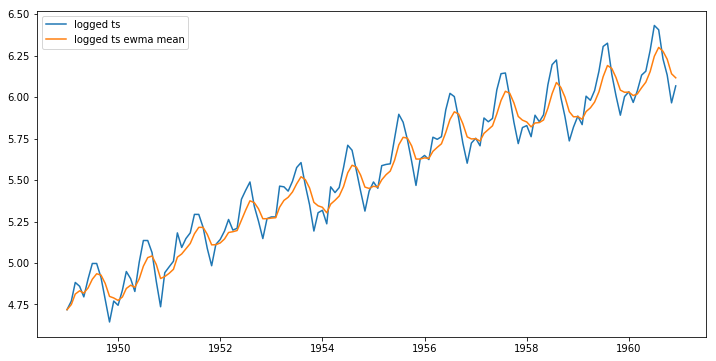

In [36]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
log_ts_ewma_mean = log_ts.ewm(2).mean()
# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,6))
plt.plot(log_ts, label='logged ts')
plt.plot(log_ts_ewma_mean, label='logged ts ewma mean')
plt.legend();

In [37]:
# Subtract the moving average from the original data and plot
log_ts_ewma = log_ts - log_ts_ewma_mean

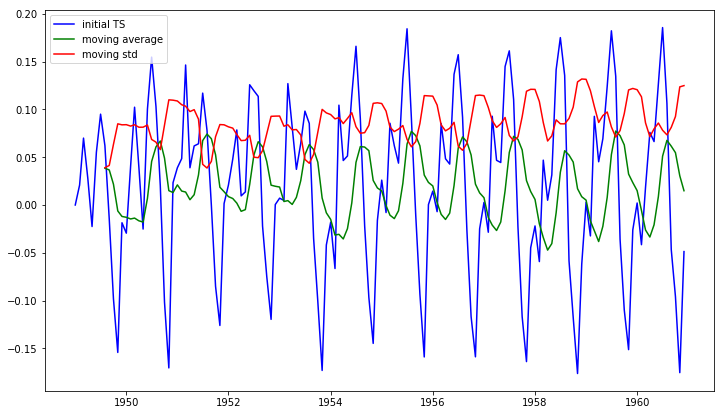

(-3.058610126861064,
 0.029771752711729736,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -546.5492712301343)

In [38]:
# do a stationarity check
stationarity_check(log_ts_ewma)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Your conclusion here

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [45]:
# difference your data and look at the head
delta_log_ts = log_ts_ewma.diff(12)
delta_log_ts.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

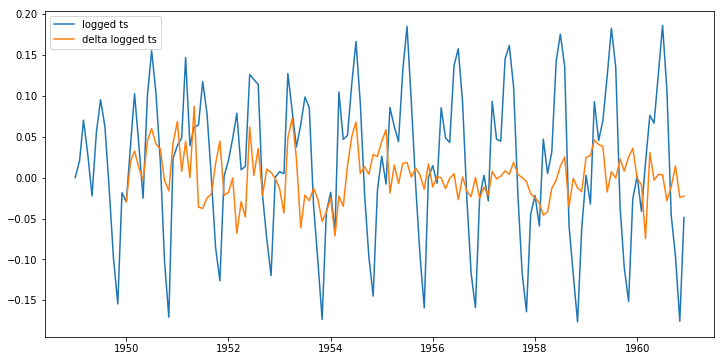

In [46]:
# plot your differenced time series
fig = plt.figure(figsize=(12,6))
plt.plot(log_ts_ewma, label='logged ts')
plt.plot(delta_log_ts, label='delta logged ts')
plt.legend();

In [47]:
# drop nas
delta_log_ts.dropna(inplace=True)

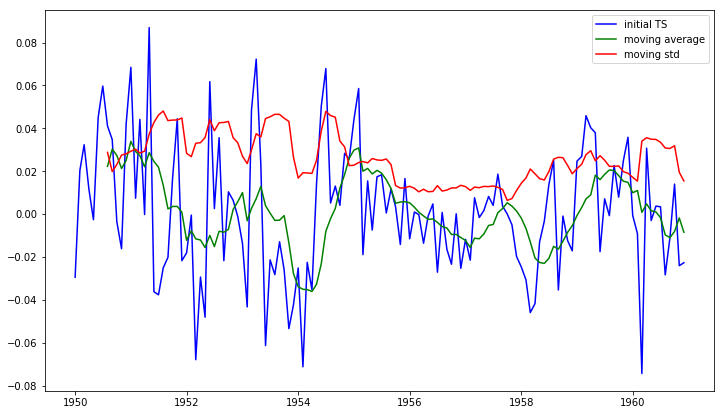

(-4.257121951112814,
 0.0005266073681678788,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -515.1552033059988)

In [48]:
# perform the stationarity check
stationarity_check(delta_log_ts)

### Your conclusion

In [ ]:
# Your conclusion here

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.